In [49]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
# shows plots in jupyter window, doesn't open a new one

In [50]:
data = pd.read_csv("ex2data1.txt", header = None, names = ["Exam 1 Score", "Exam 2 Score", "Accepted"])
m = len(data)
x0 = np.ones(m)

exam1 = np.array(data["Exam 1 Score"])
exam2 = np.array(data["Exam 2 Score"])
X = np.array([x0, exam1, exam2]).T
y = np.array(data["Accepted"]).reshape(m,1)
theta_init = np.zeros((3,1))

In [51]:
def normalize(X):
    X = X[:, 1:]
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma    

X_norm, mu, sigma = normalize(X)
X_final = np.hstack([np.ones((m,1)),X_norm])

In [52]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

Theta 0:  [0.58119252] 
Theta 1:  [1.56496775] 
Theta 2:  [1.40767345]


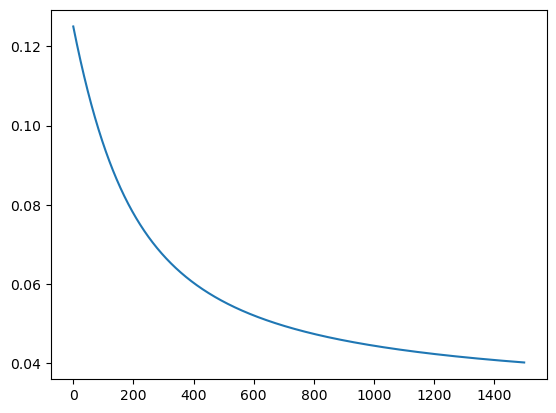

In [53]:
def linear_descent(X,y,theta,alpha,iterations):
    m=len(y)
    J_history = []
    for i in range(iterations):
        h = sigmoid(X @ theta)
        errors = h - y
        gradient = (1 / m) * (X.T @ errors)
        theta = theta - alpha * gradient
        cost = (1 / (2 * m)) * (errors.T @ errors)
        J_history.append(cost.item())
    return theta, J_history

alpha = 0.01
it = 1500
theta, J_history = linear_descent(X_final, y, theta_init, alpha, it)

print('Theta 0: ',theta[0],'\nTheta 1: ', theta[1],'\nTheta 2: ', theta[2])

plt.plot(J_history)
plt.show()

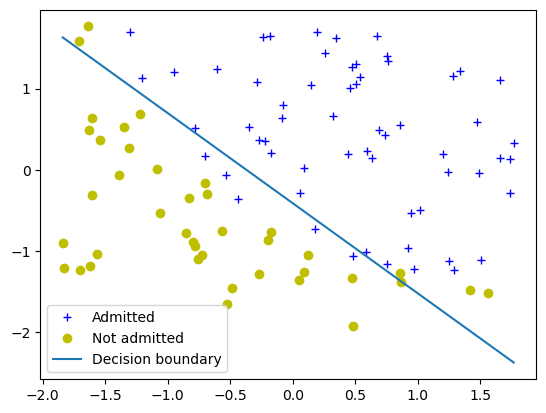

In [54]:
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

plt.plot(X_final[pos, 1], X_final[pos, 2], 'b+', label='Admitted')
plt.plot(X_final[neg, 1], X_final[neg, 2], 'yo', label='Not admitted')

# Denormalize the decision boundary by adjusting it for original features
plot_x = np.array([min(X_final[:, 1]), max(X_final[:, 1])])

# Denormalize the prediction for plot_y (adjust based on the feature scaling)
plot_y = (-theta[1] * (plot_x) - theta[0]) / theta[2]

plt.plot(plot_x, plot_y, label='Decision boundary')

plt.legend()
plt.show()